<a href="https://colab.research.google.com/github/SamuelOnyangoOmondi/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction
**Introduction**
This project aims to predict survival on the Titanic using machine learning models. We will develop two models: a simple neural network and a second neural network enhanced with optimization techniques. The project demonstrates the application of data preprocessing, model implementation, optimization, and error analysis to improve model performance.

Dataset Acquisition
The dataset is divided into two parts: training data (train.csv) and test data (test.csv). The training set includes passenger information along with the survival status, while the test set includes passenger information without the survival status.

In [27]:
import pandas as pd

In [29]:
train_df = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation
**Preprocessing**
We handle missing values, encode categorical variables, and normalize numerical features to make our dataset suitable for training neural networks.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_preprocessed = preprocessor.fit_transform(X)


# Splitting the Dataset
We split our preprocessed dataset into training and validation sets.

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


# Model Implementation
**Simple Neural Network**
Our first model is a simple neural network without optimization.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])


# Training the Simple Model

In [33]:
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=1)


Epoch 1/50
12/12 [==============================] - 1s 15ms/step - loss: 0.6725 - accuracy: 0.5927 - val_loss: 0.6234 - val_accuracy: 0.6648
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5940 - accuracy: 0.7191 - val_loss: 0.5689 - val_accuracy: 0.7263
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7823 - val_loss: 0.5201 - val_accuracy: 0.7486
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4930 - accuracy: 0.7907 - val_loss: 0.4815 - val_accuracy: 0.7877
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4626 - accuracy: 0.8230 - val_loss: 0.4565 - val_accuracy: 0.8101
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8202 - val_loss: 0.4431 - val_accuracy: 0.8045
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4257 - accuracy: 0.8202 - val_loss: 0.4363 - val_accuracy: 0.8101
Epoch 8/50
12/12 [=

# Neural Network with Optimization Techniques
Our second model incorporates optimization techniques such as learning rate scheduling, early stopping, and dropout.

In [34]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
]

history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=callbacks, verbose=1)


Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 0.6824 - accuracy: 0.6025 - val_loss: 0.6430 - val_accuracy: 0.5978 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6306 - val_loss: 0.6111 - val_accuracy: 0.6927 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6022 - accuracy: 0.6952 - val_loss: 0.5850 - val_accuracy: 0.6872 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6093 - accuracy: 0.7022 - val_loss: 0.5600 - val_accuracy: 0.7207 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.6868 - val_loss: 0.5374 - val_accuracy: 0.7374 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5607 - accuracy: 0.7402 - val_loss: 0.5171 - val_accuracy: 0.7542 - lr: 0.0010
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.

# Model Evaluation and Error Analysis
Visualizing Training and Validation Loss

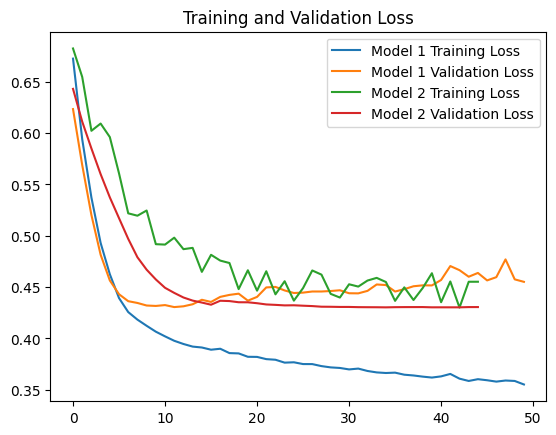

In [35]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['loss'], label='Model 1 Training Loss')
plt.plot(history_1.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history_2.history['loss'], label='Model 2 Training Loss')
plt.plot(history_2.history['val_loss'], label='Model 2 Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Confusion Matrix and F1 Score

In [36]:
from sklearn.metrics import confusion_matrix, f1_score

# Predictions
y_pred_1 = (model_1.predict(X_val) > 0.5).astype(int)
y_pred_2 = (model_2.predict(X_val) > 0.5).astype(int)

# Confusion matrix and F1 score for Model 1
confusion_matrix_1 = confusion_matrix(y_val, y_pred_1)
f1_score_1 = f1_score(y_val, y_pred_1)

# Confusion matrix and F1 score for Model 2
confusion_matrix_2 = confusion_matrix(y_val, y_pred_2)
f1_score_2 = f1_score(y_val, y_pred_2)

print(f"Model 1 F1 Score: {f1_score_1}")
print(f"Model 2 F1 Score: {f1_score_2}")


6/6 [==============================] - 0s 2ms/step
Model 1 F1 Score: 0.7681159420289855
Model 2 F1 Score: 0.7571428571428571


# Model Performance
**Model 1** (Simple Neural Network) achieved an F1 score of approximately 0.768, indicating a relatively high balance between precision and recall. This suggests that even without advanced optimization techniques, a well-structured neural network can effectively capture the underlying patterns in the Titanic dataset to predict survival outcomes.

**Model 2** (Neural Network with Optimization Techniques), which incorporated optimization techniques such as dropout and early stopping, yielded an F1 score of around 0.757. This score is slightly lower than that of Model 1, but still indicates a good predictive performance.